# Fungsi Aggregate dan Group By

Bagian sub-bab ini yang mana berisikan berikut ini:

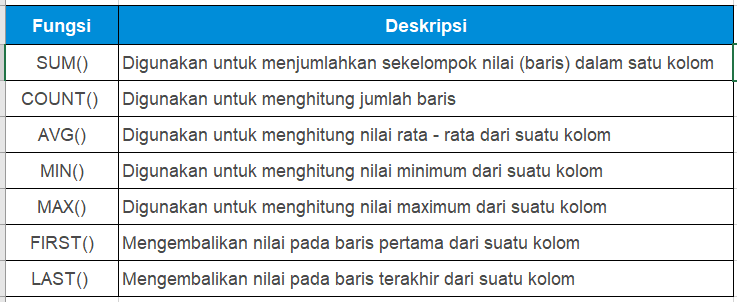

Selanjutnya, kita akan mempelajari bagaimana menggunakan SUM (Menjumlahkan), seperti berikut ini:

```sql
SELECT SUM(ColumnName)
FROM table_name;
```

In [ ]:
sql(
"""
SELECT ROUND(SUM(unit_price*quantity))
FROM order_details
"""
)

,round
0,1354459.0


Selanjutnya, kita akan mempelajari bagaimana menggunakan COUNT (Menghitung), seperti berikut ini:

```sql
SELECT COUNT(ColumnName)
FROM table_name;
```

In [ ]:
sql(
"""
SELECT COUNT(contact_name)
FROM customers
"""
)

,count
0,91


Selanjutnya, kita akan mempelajari bagaimana menggunakan AVG (Rata-rata), seperti berikut ini:

```sql
SELECT AVG(ColumnName)
FROM table_name;
```

In [ ]:
sql(
"""
SELECT ROUND(AVG(unit_price*quantity))
FROM order_details
"""
)

,round
0,629.0


Selanjutnya, kita akan mempelajari bagaimana menggunakan MIN (Nilai terkecil) atau MAX(nilai terbesar), seperti berikut ini:

```sql
SELECT MIN(ColumnName), MAX(ColumnName)
FROM table_name;
```

In [ ]:
sql(
"""
SELECT MIN(unit_price), MAX(unit_price)
FROM order_details
"""
)

,min,max
0,2.0,263.5


Selanjutnya, kita akan mempelajari dan mengenal bagaimana menggunakan GROUP BY, seperti berikut ini:

```sql
SELECT ColumnName
FROM table_name
WHERE condition
GROUP BY ColumnName
ORDER BY ColumnName;
```

Catatan:
1. GROUP BY digunakan dengan SELECT, artinya kolom yang digunakan di GROUP BY statement, juga perlu ditempatkan di SELECT.
2. GROUP BY ditempatkan setelah WHERE, tetapi jika tidak menggunakan WHERE maka langsung ditempatkan setelah FROM. 
3. Jika menggunakan ORDER BY, maka GROUP BY ditempatkan sebelum ORDER BY. 
4. Group by Single Column, data dikelompokkan menggunakan kriteria dari satu kolom saja, misalnya mengelompokkan data berdasarkan kota saja. 
5. Group by Multiple Column, data dikelompokkan menggunakan kriteria dari dua kolom atau lebih, misalnya mengelompokkan data berdasarkan kota dan merek.

In [ ]:
# Single Column
sql(
"""
SELECT ship_country, COUNT(DISTINCT order_id) as total_order, AVG(freight) as avg_price
FROM orders
GROUP BY ship_country
"""
)

,ship_country,total_order,avg_price
0,Argentina,16,37.411250
1,Austria,40,184.787501
2,Belgium,19,67.375788
3,Brazil,83,58.797470
4,Canada,30,73.269666
5,Denmark,18,77.566111
6,Finland,22,41.404091
7,France,77,55.036883
8,Germany,122,92.485902
9,Ireland,19,145.012629


In [ ]:
# Double Column
sql(
"""
SELECT ship_country, ship_name, COUNT(DISTINCT order_id) as total_order, AVG(freight) as avg_price
FROM orders
GROUP BY ship_country, ship_name
"""
)

,ship_country,ship_name,total_order,avg_price
0,Argentina,Cactus Comidas para llevar,6,12.126667
1,Argentina,Océano Atlántico Ltda.,5,61.328000
2,Argentina,Rancho grande,5,43.836000
3,Austria,Ernst Handel,30,206.846334
4,Austria,Piccolo und mehr,10,118.611001
...,...,...,...,...
85,USA,White Clover Markets,14,96.647143
86,Venezuela,GROSELLA-Restaurante,2,33.900000
87,Venezuela,HILARION-Abastos,18,69.953334
88,Venezuela,LILA-Supermercado,14,52.457857


Selanjutnya, kita akan mempelajari dan mengenal bagaimana menggunakan CASE WHEN, seperti berikut ini:

```sql
SELECT ColumnName1, ColumnName2,  
CASE  
    WHEN condition1 THEN result1  
    WHEN condition2 THEN result2  
    WHEN conditionN THEN resultN  
    ELSE result  
END as alias  
FROM TableName;
```

Catatan:

CASE-statement akan mengevaluasi kondisi yang sudah ditentukan, dimulai dari condition1, dan akan mengembalikan hasil (result1), jika condition1 terpenuhi (TRUE). Jika tidak, maka condition2 akan dievaluasi, dan akan mengembalikan result2 jika condition2 terpenuhi, dst. Apabila tidak ada kondisi yang terpenuhi, maka result pada bagian ELSE yang akan dikembalikan. 

In [ ]:
# Double Column
sql(
"""
SELECT ship_country, 
COUNT(DISTINCT order_id) as total_order, 
AVG(freight) as avg_price,
CASE
WHEN AVG(freight) > 100 THEN 'Expensive'
WHEN AVG(freight) < 50 THEN 'Cheaper'
ELSE 'Average'
END as remarks
FROM orders
GROUP BY ship_country
"""
)

,ship_country,total_order,avg_price,remarks
0,Argentina,16,37.411250,Cheaper
1,Austria,40,184.787501,Expensive
2,Belgium,19,67.375788,Average
3,Brazil,83,58.797470,Average
4,Canada,30,73.269666,Average
5,Denmark,18,77.566111,Average
6,Finland,22,41.404091,Cheaper
7,France,77,55.036883,Average
8,Germany,122,92.485902,Average
9,Ireland,19,145.012629,Expensive


Mari melakukan analisa pada order_details, yuk!

In [ ]:
# 1. Check dataset
sql(
"""
SELECT *
FROM order_details
"""
)

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [ ]:
# 2. Make new column total
sql(
"""
SELECT *, ROUND(unit_price*quantity-discount) total
FROM order_details
"""
)

,order_id,product_id,unit_price,quantity,discount,total
0,10248,11,14.00,12,0.00,168.0
1,10248,42,9.80,10,0.00,98.0
2,10248,72,34.80,5,0.00,174.0
3,10249,14,18.60,9,0.00,167.0
4,10249,51,42.40,40,0.00,1696.0
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,66.0
2151,11077,66,17.00,1,0.00,17.0
2152,11077,73,15.00,2,0.01,30.0
2153,11077,75,7.75,4,0.00,31.0


In [ ]:
# 3. calculate total revenue
....
....
....

In [ ]:
# 4. calculate total revenue based on order_id
...
...
...

In [ ]:
# 5. make remarks untuk revenue Low/Medium/High
...
...
...

**Kesimpulan**

1. Penggunaan fungsi skalar dan fungsi aggregate dalam operasi string dan numerik di SQL database
2. Penggunaan GROUP BY dalam mengelompokkan data dan memahami konsep menggabungkan GROUP BY dengan fungsi aggregate
3. Penggunaan CASE Statement untuk struktur pengambilan keputusan.